#### KNN   


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from data_parser import train_test_split
from knn import KNNClassifier

raw_data_x = [
    [3.933, 2.331],
    [3.110, 1.781],
    [1.343, 3.368],
    [3.582, 4.679],
    [2.280, 2.866],
    [7.423, 4.696],
    [5.745, 3.533],
    [9.172, 2.511],
    [7.792, 3.424],
    [7.939, 0.791]
]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

len(raw_data_x)

10

In [21]:
x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

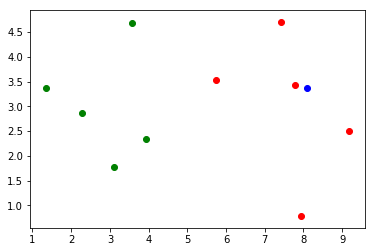

In [22]:
x = np.array([8.093, 3.365])

# 绘图的选点，y类别为0的(第一个变量， 第二个变量)，等价于x_train[y_train==0, 0],
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], color='g')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], color='r')
plt.scatter(x[0], x[1], color='b')

In [24]:
# 计算x点到所有点的欧氏距离
from math import sqrt

distances = []
for train in x_train:
    d = sqrt(np.sum((train - x) ** 2))
    distances.append(d)
distances

[4.286578589038116,
 5.228703950311205,
 6.750000666666634,
 4.6984802862202155,
 5.834378287358474,
 1.4901211360154578,
 2.354002548851636,
 1.37606576877706,
 0.30672789243888476,
 2.578602722406071]

In [25]:
# argsort返回数组从小到大的索引
nearest = np.argsort(distances)
print(nearest)

k = 6
topk_y = [y_train[i] for i in nearest[:k]]
topk_y

[8 7 5 6 9 0 3 1 4 2]


[1, 1, 1, 1, 1, 0]

In [26]:
from collections import Counter

# 输入数组，返回数组元素及其出现次数
votes = Counter(topk_y)
print(votes)
predict_y = votes.most_common(1)[0][0]
print(predict_y)

Counter({1: 5, 0: 1})
1


### sklearn 

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [28]:
print(x)
pred_x = x.reshape(1, -1)
print(pred_x)
knn.predict(pred_x)

[8.093 3.365]
[[8.093 3.365]]


array([1])